<a href="https://colab.research.google.com/github/premanshsharma/NLP-Project-Name/blob/main/NLP_PROJECT_ROUND_2_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import urllib.request 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import re
import inflect
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
def open_url(url):
    file = urllib.request.urlopen(url)
    decoded_line = ''
    for line in file:
	    decoded_line += line.decode("utf-8")
    return decoded_line
def discard(text):
    # removing starting and ending portion that is unwanted
    start = text.find('*** START OF THE PROJECT')
    end = text.find('*** END OF THE PROJECT')
    text = text[start:end]
    # removing links from text
    re.sub(r'http\S+', '', text)
    return text
def lower_case(text: str):
    return text.lower()
def lemmanization(text):
    arr = text.split()
    array = []
    lemmatizer = WordNetLemmatizer()
    for i in arr:
        array.append(lemmatizer.lemmatize(i))
    return ' '.join(array)
def remove_tags(text):
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub('', text)
def remove_punctuations(text):
    punc = '''!()-[]{};:'"\,<>./?’@”#$%^“&*_~'''
    for ele in text:
        if ele in punc:
            text = text.replace(ele, "")
    return text
def tokenization(text):
    return nltk.word_tokenize(text)
def stemming(text):
    tokens=tokenization(text)
    arr = []
    ps = PorterStemmer()
    for i in tokens:
        arr.append(ps.stem(i))
    return ' '.join(arr)
def remove_stop_words(text):
    # return [word for word in tokens if word not in STOPWORDS]
    tokens=tokenization(text)
    arr = []
    stop_words = set(stopwords.words('english'))
    for i in tokens:
        if i not in stop_words:
            arr.append(i)
    return ' '.join(arr)
def frequency_distribution(text):
    tokens = word_tokenize(text) 
    pd.Series(tokens).value_counts()[:20].plot(kind='bar')
def word_cloud_plot(text):
    tokens = tokenization(text)
    wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="black").generate(text)
    # plt the image generated by WordCloud class
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
def word_length_frequency(text):
    token = tokenization(text)
    dic = list(set(token))
    length = [len(i) for i in token]
    pd.Series(length).value_counts()[:20].plot(kind='bar')
def frequency_distribution_of_tags(tags):
    tags = [i[1] for i in tags]
    count = Counter(tags)
    x = [i for i in count]
    y = [count[i] for i in count]
    plt.plot(x, y)
    plt.show()
def pos_tagging(text):
    tokens = tokenization(text)
    tag = nltk.pos_tag(tokens)
    return tag


In [41]:
url1 = 'https://www.gutenberg.org/cache/epub/66774/pg66774.txt'
text1 = open_url(url1)
url2 = 'https://www.gutenberg.org/cache/epub/66766/pg66766.txt'
text2 = open_url(url2)
# print(text2)
def preprocessing(text):
    text=discard(text)
    text=lower_case(text)
    text=remove_tags(text)
    text=lemmanization(text)
    text=remove_punctuations(text)
    text=stemming(text)
    return text
text1 = preprocessing(text1)
text2 = preprocessing(text2)
# frequency_distribution(text1)
# frequency_distribution(text2)
# word_cloud_plot(text1)
# word_cloud_plot(text2)
text1 = remove_stop_words(text1)
text2 = remove_stop_words(text2)
# word_cloud_plot(text1)
# word_cloud_plot(text2)
# word_length_frequency(text1)
# word_length_frequency(text2)

In [5]:
def give_noun(tag):
    is_noun = lambda pos: pos[:1] == 'N'
    return [word for (word, pos) in tag if is_noun(pos)]
    
def give_verb(tag):
    is_verb = lambda pos: pos[:1] == 'V'
    return [word for (word, pos) in tag if is_verb(pos)]

tag1 = pos_tagging(text1)
tag2 = pos_tagging(text2)
# frequency_distribution_of_tags(tag1)
# frequency_distribution_of_tags(tag2)
noun_book_1 = give_noun(tag1)
noun_book_2 = give_noun(tag2)
verb_book_1 = give_verb(tag1)
verb_book_2 = give_verb(tag2)
print(len(noun_book_1), noun_book_1)
print(len(noun_book_2), noun_book_2)
print(len(verb_book_1), verb_book_1)
print(len(verb_book_2), verb_book_2)

21756 ['start', 'project', 'gutenberg', 'ebook', 'let', 'part', 'note', 'text', 'enclos', 'text', 'enclos', 'sign', '=bold=', 'addit', 'transcrib', 'seri', 'let', 'part', 'mr', 'miller', 'street', 'smith', 'york', 'let', 'part', 'shatter', 'tie', 'mr', 'miller', 'author', 'madcap', 'luci', 'loyal', 'death', 'strength', 'ladi', 'gay', 'pride', 'life', 'eagl', 'seri', 'york', 'street', 'street', 'let', 'part', 'languag', 'includ', 'key', 'line', 'cleanest', 'hand', 'book', 'diamond', 'hand', 'book', 'wa', 'man', 'woman', 'convers', 'treat', 'fact', 'attract', 'manner', 'read', 'understand', 'price', 'ten', '=sheldon', 'twentieth', 'centuri', 'letter', 'writer=', 'l', 'w', '=women', 'beautiful=', 'grace', 'shirley', '=sheldon', 'guid', 'etiquette=', 'l', 'w', 'health', 'culture=', 'prof', 'fourmen', 'dream', 'book=', 'mme', 'clare', 'rougemont', '=zingara', 'fortun', 'teller=', 'gypsi', '=the', 'art', 'box', 'selfdefense=', 'prof', '=the', 'hypnotism=', 'robert', 'g', 'ellsworth', 'md', '

In [6]:
from nltk.corpus import wordnet as wn
def categories_word(words):
    categories = []
    for i in words:
        categorie = []
        for syn in wn.synsets(i):
            if ('noun' in syn.lexname()) & ('Tops' not in syn.lexname()):
                categorie.append(syn.lexname())
            if 'verb' in syn.lexname():
                categorie.append(syn.lexname())
        categories.append(categorie)
    return categories

noun_cat_1 = categories_word(noun_book_1)
noun_cat_2 = categories_word(noun_book_2)
verb_cat_1 = categories_word(verb_book_1)
verb_cat_2 = categories_word(verb_book_2)
# print(noun_cat_1)
# print(noun_cat_2)
print(verb_cat_1)
print(verb_cat_2)

[['noun.act', 'noun.food', 'noun.food', 'noun.act', 'verb.contact', 'verb.contact'], ['noun.communication'], ['noun.communication', 'noun.communication', 'noun.communication', 'noun.communication', 'noun.attribute', 'noun.possession', 'noun.communication', 'noun.state', 'noun.possession', 'verb.communication', 'verb.perception', 'verb.perception', 'verb.communication'], ['noun.location', 'noun.time', 'noun.event', 'noun.cognition', 'noun.cognition', 'noun.state', 'noun.location', 'noun.person', 'noun.location', 'noun.location', 'noun.act', 'noun.communication', 'noun.artifact', 'noun.act', 'verb.stative', 'verb.change', 'verb.stative', 'verb.creation'], ['noun.act', 'noun.food', 'noun.food', 'noun.act', 'verb.contact', 'verb.contact'], ['noun.act', 'noun.food', 'noun.food', 'noun.act', 'verb.contact', 'verb.contact'], ['noun.feeling', 'noun.cognition', 'noun.person', 'noun.feeling', 'noun.quantity', 'noun.act', 'verb.emotion', 'verb.emotion', 'verb.emotion', 'verb.contact'], [], [], ['

In [7]:
def synset(noun, verb):
    nouns = []
    verbs = []
    for word in noun:
        for syn in wn.synsets(word):
            if ('noun' in syn.lexname()) & ('Tops' not in syn.lexname()):
                nouns.append(syn.lexname())
            if 'verb' in syn.lexname():
                verbs.append(syn.lexname())
    for word in verb:
        for syn in wn.synsets(word):
            if ('noun' in syn.lexname()) & ('Tops' not in syn.lexname()):
                nouns.append(syn.lexname())
            if 'verb' in syn.lexname():
                verbs.append(syn.lexname())

    return nouns, verbs

noun_superset1, verb_superset1 = synset(noun_book_1, verb_book_1)
noun_superset2, verb_superset2 = synset(noun_book_2, verb_book_2)
# print(noun_superset1)
# print(verb_superset1)
# print(noun_superset2)
print(verb_superset2)

['verb.change', 'verb.change', 'verb.motion', 'verb.stative', 'verb.creation', 'verb.creation', 'verb.motion', 'verb.motion', 'verb.motion', 'verb.social', 'verb.competition', 'verb.stative', 'verb.social', 'verb.motion', 'verb.communication', 'verb.stative', 'verb.contact', 'verb.perception', 'verb.perception', 'verb.creation', 'verb.creation', 'verb.cognition', 'verb.creation', 'verb.creation', 'verb.contact', 'verb.cognition', 'verb.change', 'verb.change', 'verb.contact', 'verb.change', 'verb.possession', 'verb.perception', 'verb.contact', 'verb.change', 'verb.change', 'verb.change', 'verb.change', 'verb.contact', 'verb.change', 'verb.possession', 'verb.perception', 'verb.contact', 'verb.change', 'verb.change', 'verb.communication', 'verb.communication', 'verb.communication', 'verb.communication', 'verb.communication', 'verb.communication', 'verb.possession', 'verb.perception', 'verb.contact', 'verb.change', 'verb.change', 'verb.creation', 'verb.stative', 'verb.motion', 'verb.commun

([<matplotlib.axis.XTick at 0x7f77d32e5990>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21'),
  Text(0, 0, '22'),
  Text(0, 0, '23'),
  Text(0, 0, '24')])

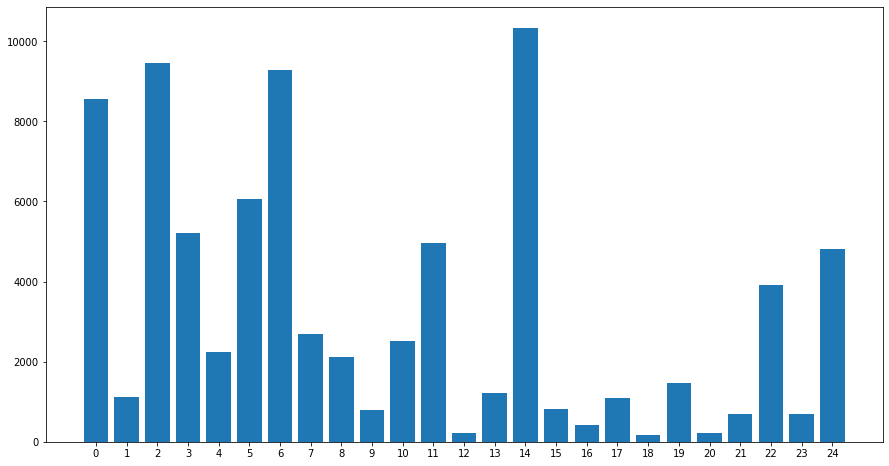

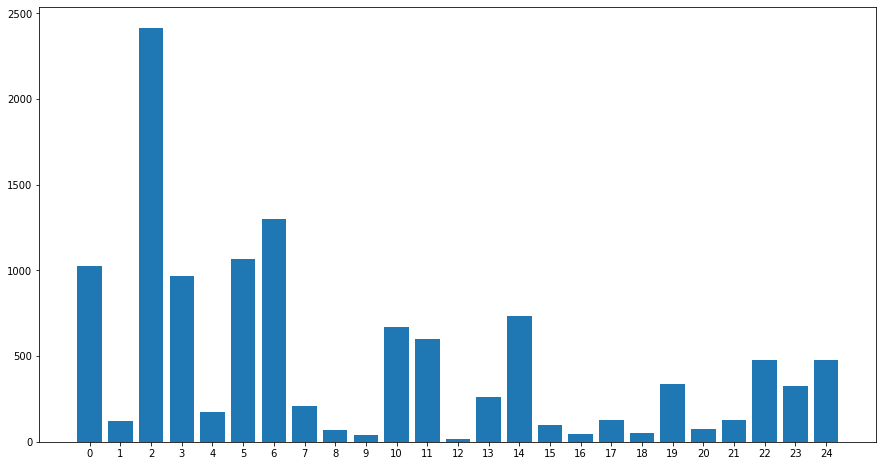

In [8]:
import matplotlib.pyplot as plt
import numpy as np
labels, counts = np.unique(noun_superset1, return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15, 8))
plt.bar(ticks, counts, align='center')
plt.xticks(ticks, range(len(counts)))
labels, counts = np.unique(noun_superset2, return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15, 8))
plt.bar(ticks, counts, align='center')
plt.xticks(ticks, range(len(labels)))

In [11]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
doc1 = nlp(text1)
doc2 = nlp(text2)
print([[x, x.ent_iob_] for x in doc1])
print([[x, x.ent_iob_] for x in doc2])

[[start, 'O'], [project, 'O'], [gutenberg, 'O'], [ebook, 'O'], [let, 'O'], [u, 'O'], [kiss, 'O'], [part, 'O'], [transcrib, 'O'], [note, 'O'], [text, 'O'], [enclos, 'O'], [underscor, 'O'], [ital, 'O'], [ital, 'O'], [text, 'O'], [enclos, 'O'], [equal, 'O'], [sign, 'O'], [bold, 'O'], [=, 'O'], [bold=, 'B'], [addit, 'O'], [transcrib, 'O'], [note, 'O'], [end, 'O'], [new, 'O'], [eagl, 'O'], [seri, 'O'], [943, 'B'], [let, 'O'], [u, 'O'], [kiss, 'O'], [part, 'O'], [mr, 'O'], [alex, 'O'], [mcveigh, 'O'], [miller, 'O'], [illustr, 'O'], [street, 'O'], [smith, 'O'], [publish, 'O'], [new, 'B'], [york, 'I'], [let, 'O'], [u, 'B'], [kiss, 'I'], [part, 'I'], [shatter, 'O'], [tie, 'O'], [mr, 'O'], [alex, 'B'], [mcveigh, 'I'], [miller, 'I'], [author, 'O'], [pretti, 'B'], [madcap, 'I'], [luci, 'I'], [fatal, 'O'], [kiss, 'O'], [loyal, 'O'], [unto, 'O'], [death, 'O'], [strength, 'O'], [love, 'O'], [ladi, 'O'], [gay, 'O'], [pride, 'O'], [mani, 'B'], [romanc, 'I'], [american, 'I'], [life, 'O'], [publish, 'O']

In [24]:
def entity_recognition(text):
  doc=nlp(text)
  person=[]
  org=[]
  location=[]
  for X in doc:  
    if (X.ent_type_=='PERSON') and X.text not in person:
      person.append(X.text)
    if (X.ent_type_=='ORG')and X.text not in org:
      org.append(X.text)
    if ((X.ent_type_=='LOC') or (X.ent_type_=='GPE')) and X.text not in location:
      location.append(X.text)
  return person,org,location
def freq(str_list): 
    unique_words = set(str_list)
    counts = {}
    for words in unique_words : 
        counts[words] = str_list.count(words)
    return counts
person1,org1,location1=entity_recognition(text1)
person2,org2,location2=entity_recognition(text2)
print(person1)
print(org1)
print(location1)
print(person2)
print(org2)
print(location2)      

['alex', 'mcveigh', 'miller', 'pretti', 'madcap', 'luci', 'mani', 'romanc', 'american', 'seri', 'illustr', 'l', 'w', 'sheldon', 'robert', 'g', 'grace', 'shirley', 'frank', 'merriwel', 'stephen', 'sent', 'nan', 'mari', 'denison', 'charl', 'king', 'john', 'habberton', 'richard', 'dowl', 'edward', 'elli', 'new', 'raymond', 'medal', 'courag', 'cameron', 'audaci', 'jack', 'wheeler', 'david', 'southwick', 'marriag', 'j', 'holm', 'samuel', 'lover', 'halifax', 'gentleman', 'quarrel', 'veri', 'young', 'futur', 'misfortun', 'wolf', 'poverti', 'bitterli', 'wa', 'furiou', 'angri', 'eye', 'reconcili', 'secretli', 'desir', 'red', 'mouth', 'quiver', 'haughti', 'head', 'estrang', 'part', 'thi', 'strang', 'chapter', 'ii', 'jessi', 'stoop', 'kiss', 'mediums', 'lyndon', 'axin', 'mither', 'ani', 'friend', 'tenderli', 'kindli', 'ryan', 'curtli', 'godfrey', 'heard', 'grief', 'poor', 'plaintiv', 'i', 'needl', 'cours', 'child', 'astonish', 'eagerli', 'continu', 'way', 'divorc', 'liber', 'twa', 'suppos', 'pass

In [42]:
url1 = 'https://www.gutenberg.org/cache/epub/66774/pg66774.txt'
text1 = open_url(url1)
url2 = 'https://www.gutenberg.org/cache/epub/66766/pg66766.txt'
text2 = open_url(url2)
url3 = 'https://www.gutenberg.org/cache/epub/66983/pg66983.txt'
text3 = open_url(url3)
text1 = preprocessing(text1)
text2 = preprocessing(text2)
text3 = preprocessing(text3)
token1 = tokenization(text1)
token2 = tokenization(text2)
token3 = tokenization(text3)

In [43]:
import math
def find_tf(token):
    n = len(token)
    count = Counter(token)
    tf = []
    for i in count:
        tf.append(count[i]/n)
    return tf

def find_idf(token):
    count1 = Counter(token1)
    count2 = Counter(token2)
    count3 = Counter(token3)
    count = Counter(token)
    idf = []
    for i in count:
        d = 0
        if i in count1:
            d += 1
        if i in count2:
            d += 1
        if i in count3:
            d += 1
        idf.append(math.log(3/d))
    return idf

def find_tf_idf(tf, idf):
    a = []
    for i in range(len(tf)):
        a.append(tf[i]*idf[i])
    return a

idf1 = find_idf(token1)
tf1 = find_tf(token1)
tf_idf_1 = find_tf_idf(tf1, idf1)
idf2 = find_idf(token2)
tf2 = find_tf(token2)
tf_idf_2 = find_tf_idf(tf2, idf2)
idf3 = find_idf(token3)
tf3 = find_tf(token3)
tf_idf_3 = find_tf_idf(tf3, idf3)

In [45]:
from numpy import dot
from numpy.linalg import norm
def cosine_similarity(a, b):
    if len(a) < len(b):
        b = b[:len(a)]
    else:
        a = a[:len(b)]
    List1 = a
    List2 = b
    result = dot(List1, List2)/(norm(List1)*norm(List2))
    return result
print('Cosine Similarity between book 1 and 2 after lemmatization', cosine_similarity(tf_idf_1, tf_idf_2))
print('Cosine Similarity between book 1 and 3 after lemmatization', cosine_similarity( tf_idf_1, tf_idf_3))
print('Cosine Similarity between book 3 and 2 after lemmatization', cosine_similarity( tf_idf_3, tf_idf_2))

Cosine Similarity between book 1 and 2 after lemmatization 0.11042480820176097
Cosine Similarity between book 1 and 3 after lemmatization 0.13182825768015066
Cosine Similarity between book 3 and 2 after lemmatization 0.20109498118379526
